In [1]:
from platform import python_version
print(python_version() )
import rebound
print(rebound.__version__)

3.10.9
3.17.3


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dask.dataframe as dd
import rebound
%matplotlib inline
#change it to my dictionary
datafolder = '/home/yba/spock/data/'
Nout = 1729


/tmp/ipykernel_248958/3378637280.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv('/home/yba/spock/training_data/resonant/runstrings.csv', header=None, index_col=0, squeeze=True)


(<Figure size 500x500 with 1 Axes>, <AxesSubplot: xlabel='x', ylabel='y'>)

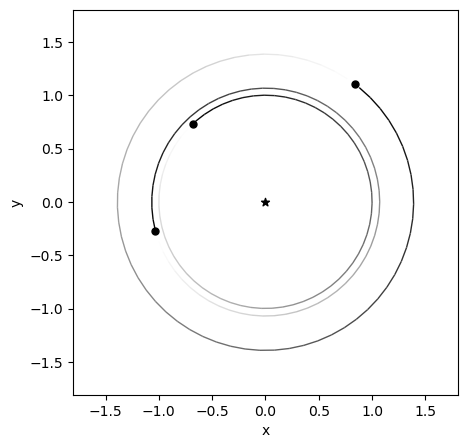

In [7]:
## read initial condition from CSV

#testing
df = pd.read_csv('/home/yba/spock/training_data/resonant/runstrings.csv', header=None, index_col=0, squeeze=True)

# convert the dataframe into a dictionary
my_dict = df.to_dict()

# the binary file name you want to search for
binary_file_name = "7923606.bin"

# search for the binary file name in the dictionary
for key, value in my_dict.items():
    if value == binary_file_name:
        i = int(key)


all_data = np.loadtxt('/home/yba/spock/data/resonant/initial_conditions.csv', delimiter=',',dtype=np.float64)
# get corresponding row
data = all_data[i]
# create a new simulation
sim = rebound.Simulation()
sim.G=4*np.pi**2
sim.add(m=data[0], x=data[1], y=data[2], z=data[3], vx=data[4], vy=data[5], vz=data[6])
sim.add(m=data[7], x=data[8], y=data[9], z=data[10], vx=data[11], vy=data[12], vz=data[13])
sim.add(m=data[14], x=data[15], y=data[16], z=data[17], vx=data[18], vy=data[19], vz=data[20])
sim.add(m=data[21], x=data[22], y=data[23], z=data[24], vx=data[25], vy=data[26], vz=data[27])

rebound.OrbitPlot(sim)

In [39]:
df = pd.read_csv('/home/yba/spock/training_data/resonant/runstrings.csv', index_col=0)
df.head()

,runstring
0,0000000.bin
1,0000001.bin
2,0000002.bin
3,0000003.bin
4,0000004.bin


In [34]:
def test(runstring):
    return runstring

df.head()['test'] = df.head().apply(lambda row: test(row['runstring']), axis=1)

/tmp/ipykernel_1987633/3766075168.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head()['test'] = df.head().apply(lambda row: test(row['runstring']), axis=1)


In [16]:
# convert the dataframe into a dictionary
dfdict = df['runstring'].to_dict()  

In [9]:
# tmax function

def tmax(filename):
    # search for the binary file name in the dictionary
    for key, value in dfdict.items():
        if value == filename:
            i = int(key)

    all_data = np.loadtxt('initial_condition_resonant.csv', delimiter=',',dtype=np.float64)
    # get corresponding row
    data = all_data[i]
    # create a new simulation
    sim = rebound.Simulation()
    sim.G=4*np.pi**2
    sim.add(m=data[0], x=data[1], y=data[2], z=data[3], vx=data[4], vy=data[5], vz=data[6])
    sim.add(m=data[7], x=data[8], y=data[9], z=data[10], vx=data[11], vy=data[12], vz=data[13])
    sim.add(m=data[14], x=data[15], y=data[16], z=data[17], vx=data[18], vy=data[19], vz=data[20])
    sim.add(m=data[21], x=data[22], y=data[23], z=data[24], vx=data[25], vy=data[26], vz=data[27])

    mtotal = sim.particles[1].m + sim.particles[2].m  + sim.particles[3].m
    alpha13 = sim.particles[1].a / sim.particles[3].a 
    ec13 = 1-alpha13 
    Tsec = 4* sim.particles[0].m/mtotal * ec13 * ec13  * sim.particles[3].P
    tmax = 5* Tsec
    return tmax

In [11]:
#testing
df = pd.read_csv('/home/yba/spock/training_data/resonant/runstrings.csv', header=None, index_col=0, squeeze=True)


# convert the dataframe into a dictionary
my_dict = df.to_dict()

/tmp/ipykernel_2313187/139709524.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv('/home/yba/spock/training_data/resonant/runstrings.csv', header=None, index_col=0, squeeze=True)


In [ ]:
# Try to write tmax in label
# Read the CSV file
df = pd.read_csv('/home/yba/spock/training_data/resonant/labels_testing.csv', index_col=0)
# Apply the tmax function to each entry in the 'runstring' column

#df['tmax'] = df['runstring'].apply(tmax)
tmax_results = [tmax(runstring) for runstring in df['runstring'].head(10)]

# Apply the tmax function to each entry in the 'runstring' column
df['tmax'] = df['runstring'].apply(tmax)

# Write the updated DataFrame back to a new CSV file
df.to_csv('label_with_tmax.csv', index=False)


In [ ]:
# Print the results
for index, value in enumerate(tmax_results):
    print(f"Row {index}: tmax = {value}")

In [26]:
binary_file_name = df.iloc[1]['runstring']
tmax(binary_file_name)

5.053375057911378

In [10]:
tmaxs = []
for i, row in df.iterrows():
    print(tmax(row['runstring']))

335715.31553168496
113077.20309658354
164368.51920598844
204355.34411149117
37796.701358865976
225319.7401920997
118688.8506106152
188852.83973366694
53104.50120111458
55796.18012835216
217410.9745865923
267069.5430894482
69109.53667258358
73001.581320157
104245.07744460594
51680.82701923509
92558.46392694824
238474.20096256855
171862.5004354639
439725.2461455447
98068.4537110677
278985.30602130666
160879.0638562339
132285.24334701576
190677.40016599576
320609.7477906016


KeyboardInterrupt: 

In [ ]:
print(tmaxs)

In [4]:
# Read the CSV file
df = pd.read_csv('label.csv')

# Apply the tmax function to the 'runstring' column of the first 10 rows and print the results
tmax_results = [tmax(runstring) for runstring in df['runstring'].head(10)]

# Print the results
for index, value in enumerate(tmax_results):
    print(f"Row {index}: tmax = {value}")

FileNotFoundError: [Errno 2] No such file or directory: 'label.csv'

/tmp/ipykernel_665403/2207326527.py:7: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv('/home/yba/spock/training_data/resonant/runstrings.csv', header=None, index_col=0, squeeze=True)


(<Figure size 500x500 with 1 Axes>, <AxesSubplot: xlabel='x', ylabel='y'>)

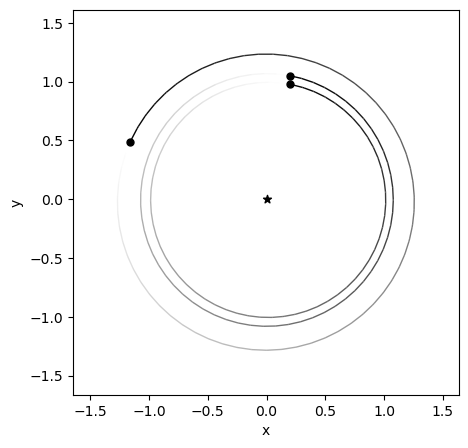

In [3]:
## Testing with tmax function start here
## ----------------------------------------------------------------------------

## read initial condition from CSV

#testing
df = pd.read_csv('/home/yba/spock/training_data/resonant/runstrings.csv', header=None, index_col=0, squeeze=True)

# convert the dataframe into a dictionary
my_dict = df.to_dict()

# the binary file name you want to search for
binary_file_name = "8332250.bin"

# search for the binary file name in the dictionary
for key, value in my_dict.items():
    if value == binary_file_name:
        i = int(key)


all_data = np.loadtxt('/home/yba/spock/data/resonant/initial_conditions.csv', delimiter=',',dtype=np.float64)
# get corresponding row
data = all_data[i]
# create a new simulation
sim = rebound.Simulation()
sim.G=4*np.pi**2
sim.add(m=data[0], x=data[1], y=data[2], z=data[3], vx=data[4], vy=data[5], vz=data[6])
sim.add(m=data[7], x=data[8], y=data[9], z=data[10], vx=data[11], vy=data[12], vz=data[13])
sim.add(m=data[14], x=data[15], y=data[16], z=data[17], vx=data[18], vy=data[19], vz=data[20])
sim.add(m=data[21], x=data[22], y=data[23], z=data[24], vx=data[25], vy=data[26], vz=data[27])

rebound.OrbitPlot(sim)

In [4]:
mtotal = sim.particles[1].m + sim.particles[2].m  + sim.particles[3].m
alpha13 = sim.particles[1].a / sim.particles[3].a 
ec13 = 1-alpha13 
Tsec = 4* sim.particles[0].m/mtotal * ec13 * ec13  * sim.particles[3].P
tmax = 5* Tsec
tmax

105086.20451648772

In [5]:
from spock import FeatureClassifier

/mnt/ssd/miniconda3/envs/yba/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [6]:
model = FeatureClassifier()

In [7]:
%%time
model.predict_stable(sim)

CPU times: user 7.09 s, sys: 0 ns, total: 7.09 s
Wall time: 4.82 s


0.005517978

In [46]:
from collections import OrderedDict
import sys
sys.path.append('../spock')
sys.path.append('../../spock')
from simsetup import init_sim_parameters
from feature_functions import features

kwargs = OrderedDict()
kwargs['Norbits'] = 1e4
kwargs['Nout'] = 80 
kwargs['trio'] = [[1,2,3]]
args = list(kwargs.values())
init_sim_parameters(sim)


In [47]:
#features function

import rebound
import numpy as np
from collections import OrderedDict

######################### Taken from celmech github.com/shadden/celmech
def farey_sequence(n):
    """Return the nth Farey sequence as order pairs of the form (N,D) where `N' is the numerator and `D' is the denominator."""
    a, b, c, d = 0, 1, 1, n
    sequence=[(a,b)]
    while (c <= n):
        k = int((n + b) / d)
        a, b, c, d = c, d, (k*c-a), (k*d-b)
        sequence.append( (a,b) )
    return sequence
def resonant_period_ratios(min_per_ratio,max_per_ratio,order):
    """Return the period ratios of all resonances up to order 'order' between 'min_per_ratio' and 'max_per_ratio' """
    if min_per_ratio < 0.:
        raise AttributeError("min_per_ratio of {0} passed to resonant_period_ratios can't be < 0".format(min_per_ratio))
    if max_per_ratio >= 1.:
        raise AttributeError("max_per_ratio of {0} passed to resonant_period_ratios can't be >= 1".format(max_per_ratio))
    minJ = int(np.floor(1. /(1. - min_per_ratio)))
    maxJ = int(np.ceil(1. /(1. - max_per_ratio)))
    res_ratios=[(minJ-1,minJ)]
    for j in range(minJ,maxJ):
        res_ratios = res_ratios + [ ( x[1] * j - x[1] + x[0] , x[1] * j + x[0]) for x in farey_sequence(order)[1:] ]
    res_ratios = np.array(res_ratios)
    msk = np.array( list(map( lambda x: min_per_ratio < x[0]/float(x[1]) < max_per_ratio , res_ratios )) )
    return res_ratios[msk]
##########################

# sorts out which pair of planets has a smaller EMcross, labels that pair inner, other adjacent pair outer
# returns a list of two lists, with [label (near or far), i1, i2], where i1 and i2 are the indices, with i1 
# having the smaller semimajor axis
def get_pairs(sim, indices):
    ps = sim.particles
    sortedindices = sorted(indices, key=lambda i: ps[i].a) # sort from inner to outer
    EMcrossInner = (ps[sortedindices[1]].a-ps[sortedindices[0]].a)/ps[sortedindices[0]].a
    EMcrossOuter = (ps[sortedindices[2]].a-ps[sortedindices[1]].a)/ps[sortedindices[1]].a

    if EMcrossInner < EMcrossOuter:
        return [['near', sortedindices[0], sortedindices[1]], ['far', sortedindices[1], sortedindices[2]]]
    else:
        return [['near', sortedindices[1], sortedindices[2]], ['far', sortedindices[0], sortedindices[1]]]

def find_strongest_MMR(sim, i1, i2):
    maxorder = 2
    ps = sim.particles
    n1 = ps[i1].n
    n2 = ps[i2].n

    m1 = ps[i1].m/ps[0].m
    m2 = ps[i2].m/ps[0].m

    Pratio = n2/n1

    delta = 0.03
    if Pratio < 0 or Pratio > 1: # n < 0 = hyperbolic orbit, Pratio > 1 = orbits are crossing
        return np.nan, np.nan, np.nan

    minperiodratio = max(Pratio-delta, 0.)
    maxperiodratio = min(Pratio+delta, 0.99) # too many resonances close to 1
    res = resonant_period_ratios(minperiodratio,maxperiodratio, order=2)

    # Calculating EM exactly would have to be done in celmech for each j/k res below, and would slow things down. This is good enough for approx expression
    EM = np.sqrt((ps[i1].e*np.cos(ps[i1].pomega) - ps[i2].e*np.cos(ps[i2].pomega))**2 + (ps[i1].e*np.sin(ps[i1].pomega) - ps[i2].e*np.sin(ps[i2].pomega))**2)
    EMcross = (ps[i2].a-ps[i1].a)/ps[i1].a

    j, k, maxstrength = np.nan, np.nan, 0 
    for a, b in res:
        nres = (b*n2 - a*n1)/n1
        if nres == 0:
            s = np.inf # still want to identify as strongest MMR if initial condition is exatly b*n2-a*n1 = 0
        else:
            s = np.abs(np.sqrt(m1+m2)*(EM/EMcross)**((b-a)/2.)/nres)
        if s > maxstrength:
            j = b
            k = b-a
            maxstrength = s
    if maxstrength == 0:
        maxstrength = np.nan

    return j, k, maxstrength

def populate_trio(sim, trio, pairs, tseries, i):
    Ns = 3
    ps = sim.particles
    for q, [label, i1, i2] in enumerate(pairs):
        m1 = ps[i1].m
        m2 = ps[i2].m
        e1x, e1y = ps[i1].e*np.cos(ps[i1].pomega), ps[i1].e*np.sin(ps[i1].pomega)
        e2x, e2y = ps[i2].e*np.cos(ps[i2].pomega), ps[i2].e*np.sin(ps[i2].pomega)
        tseries[i,Ns*q+1] = np.sqrt((e2x-e1x)**2 + (e2y-e1y)**2)
        tseries[i,Ns*q+2] = np.sqrt((m1*e1x + m2*e2x)**2 + (m1*e1y + m2*e2y)**2)/(m1+m2)
        j, k, tseries[i,Ns*q+3] = find_strongest_MMR(sim, i1, i2) 

    tseries[i,7] = sim.calculate_megno() # megno

def get_tseries(sim, args):
    mtotal = sim.particles[1].m + sim.particles[2].m  + sim.particles[3].m
    alpha13 = sim.particles[1].a / sim.particles[3].a 
    ec13 = 1-alpha13 
    Tsec = 4* sim.particles[0].m/mtotal * ec13 * ec13  * sim.particles[3].P
    Norbits = 0.3* Tsec
    #Norbits = args[0]
    Nout = args[1]
    trios = args[2]
    
    minP = np.min([p.P for p in sim.particles[1:sim.N_real]])

    # want hyperbolic case to run so it raises exception
    times = np.linspace(0, Norbits*np.abs(minP), Nout)
    
    triopairs, triotseries = [], []
    for tr, trio in enumerate(trios): # For each trio there are two adjacent pairs 
        triopairs.append(get_pairs(sim, trio))
        triotseries.append(np.zeros((Nout, 8))*np.nan)

    if np.isnan(sim.dt): # initially hyperbolic orbit, set in simsetup/set_integrator_and_timestep
        stable = False
        return triotseries, stable

    for i, time in enumerate(times):
        try:
            sim.integrate(time, exact_finish_time=0)
        except (rebound.Collision, rebound.Escape):
            stable = False
            print(sim.t)
            return triotseries, stable

        for tseries in triotseries:
            tseries[i,0] = sim.t/minP  # time

        for tr, trio in enumerate(trios):
            pairs = triopairs[tr]
            tseries = triotseries[tr] 
            populate_trio(sim, trio, pairs, tseries, i)
    
    stable = True
    return triotseries, stable


In [37]:
mtotal = sim.particles[1].m + sim.particles[2].m  + sim.particles[3].m
alpha13 = sim.particles[1].a / sim.particles[3].a 
ec13 = 1-alpha13 
Tsec = 4* sim.particles[0].m/mtotal * ec13 * ec13  * sim.particles[3].P
Norbits = Tsec
# Norbits = args[0]
Nout = args[1]
trios = args[2]
ps  = sim.particles
triofeatures = []
for tr, trio in enumerate(trios):
    features = OrderedDict()
    pairs = get_pairs(sim, trio)
    for i, [label, i1, i2] in enumerate(pairs):
        features['EMcross'+label] = (ps[i2].a-ps[i1].a)/ps[i1].a
        features['EMfracstd'+label] = np.nan
        features['EPstd'+label] = np.nan
        features['MMRstrength'+label] = np.nan

    features['MEGNO'] = np.nan
    features['MEGNOstd'] = np.nan
    triofeatures.append(features)

triotseries, stable = get_tseries(sim, args)
if stable == False:
    print(triofeatures, stable)
    

for features, tseries in zip(triofeatures, triotseries):
    EMnear = tseries[:, 1]
    EPnear = tseries[:, 2]
    # cut out first value (init cond) to avoid cases
    # where user sets exactly b*n2 - a*n1 & strength is inf
    MMRstrengthnear = tseries[1:,3]
    EMfar = tseries[:, 4]
    EPfar = tseries[:, 5]
    MMRstrengthfar = tseries[1:,6]
    MEGNO = tseries[:, 7]

    if not np.isnan(MEGNO).any(): # no nans
        features['MEGNO'] = np.median(MEGNO[-int(Nout/10):]) # smooth last 10% to remove oscillations around 2
        features['MEGNOstd'] = MEGNO[int(Nout/5):].std()
    features['MMRstrengthnear'] = np.median(MMRstrengthnear)
    features['MMRstrengthfar'] = np.median(MMRstrengthfar)
    features['EMfracstdnear'] = EMnear.std() / features['EMcrossnear']
    features['EMfracstdfar'] = EMfar.std() / features['EMcrossfar']
    features['EPstdnear'] = EPnear.std() 
    features['EPstdfar'] = EPfar.std() 



In [38]:
print(features)

OrderedDict([('EMcrossnear', 0.07466745596609617), ('EMfracstdnear', 0.03475302329756512), ('EPstdnear', 6.710974468846196e-05), ('MMRstrengthnear', 0.05916592417553675), ('EMcrossfar', 0.17491046650390685), ('EMfracstdfar', 0.004130640914926202), ('EPstdfar', 0.00025093094178048054), ('MMRstrengthfar', 0.013906994747352325), ('MEGNO', 2.3549001896472976), ('MEGNOstd', 0.14624493450110113)])


In [18]:
Norbits = args[0]
Norbits

8105.50864695111

/mnt/ssd/home/yba/rebound/rebound/simulationarchive.py:99: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/home/yba/rebound/rebound/simulationarchive.py:146: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/home/yba/rebound/rebound/simulationarchive.py:146: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)


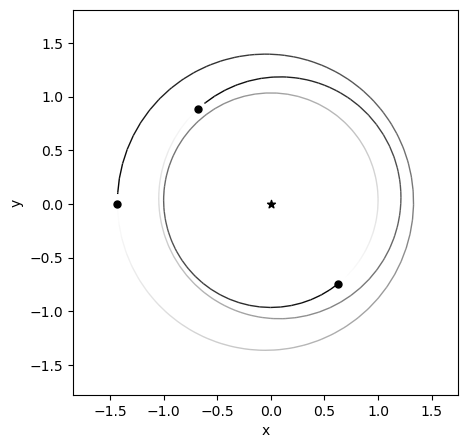

In [11]:
### 
sa = rebound.SimulationArchive(datafolder+'resonant/simulation_archives/runs/sa0000010.bin')# read the file
sim2 = sa[0] # read the initial condition
fig = rebound.OrbitPlot(sim2) #plot it first